In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [213]:
# Read in data

movies = pd.read_csv('movies.csv')

In [214]:
# Looking at the data

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [215]:
# Check for null values

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [216]:
## FIXING NULL ##

In [217]:
# Budget has a lot of null values
# Checking which value to use to fill nulls
movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [218]:
## using yearly budget means to fill in missing values
movies['budget'] = movies['budget'].fillna(movies.groupby('year')['budget'].transform('mean'))

In [219]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

# budget nulls are fixed

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 0.0%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [220]:
# Looking at gross nulls

# Isn't very many nulls so I'm going to just fill it with overall mean

movies['gross'].fillna(np.mean(movies['gross']), inplace = True)

In [221]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# Gross nulls are fixed. 

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [222]:
# Filling rating nulls
# Small amount of nulls again, going to fill with either mean or mode

movies['rating'].fillna(movies['rating'].mode()[0], inplace = True)

In [223]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# Ratings nulls are full

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [224]:
# Filling company nulls with mode
movies['company'].fillna(movies['company'].mode()[0], inplace = True)

In [225]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# Company nulls are filled

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.05216484089723526%


In [226]:
# Filling runtime with mean
movies['runtime'].fillna(np.mean(movies['runtime']), inplace = True)

In [227]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# Runtime nulls are filled

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [228]:
# Only 3 nulls for writer, going to fill these manually with a google search
movies[movies['writer'].isnull()]
movies.loc[[1820], ['writer']] = 'Derek Jarman'
movies.loc[[5834], ['writer']] = 'Michael Winterbottom'
movies.loc[[7655], ['writer']] = 'Xie Xiying'

In [229]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# writer nulls are filled

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.0%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [230]:
## Fill country nulls

# only 3 nulls again, filling these manually

movies[movies['country'].isnull()]
movies.loc[[5728], ['country']] = 'United States'
movies.loc[[5730], ['country']] = 'United States'
movies.loc[[7615], ['country']] = 'United States'


In [231]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# country nulls are filled

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.0%
star - 0.013041210224308816%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [232]:
# Filling score nulls with mean
movies['score'].fillna(np.mean(movies['score']), inplace = True)

In [233]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# score nulls are filled

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.0%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.0%
star - 0.013041210224308816%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [234]:
# Filling votes nulls with mean
movies['votes'].fillna(np.mean(movies['votes']), inplace = True)

In [235]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# votes nulls are filled

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.013041210224308816%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [236]:
# Filling nulls for released manually

movies[movies['released'].isnull()]
movies.loc[[5728],['released']] = 'January 25, 2011'
movies.loc[[5730],['released']] = 'February 12, 2010'

In [237]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# released nulls are filled

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.013041210224308816%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [238]:
# Filling star nulls manually
movies[movies['star'].isnull()]
movies.loc[[474],['star']] = 'Tom Logan'

In [239]:
# Checking null values again
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# released nulls are filled

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [240]:
# Data types for our cleaning

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [241]:
# Changing data types to get rid of floating decimal place

movies['budget'] = movies['budget'].astype('int64')

movies['gross'] = movies['gross'].astype('int64')

In [262]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [243]:
# released columm and year column don't always match. Getting year
# from released column and using that for year.

movies['year_correct'] = movies['released'].str.split(' ').str[2]

In [263]:
# Looking at top grossing movies
movies.sort_values(by = ['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [245]:
pd.set_option('display.max_rows', None)

In [264]:
# Drop any duplicates

movies.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


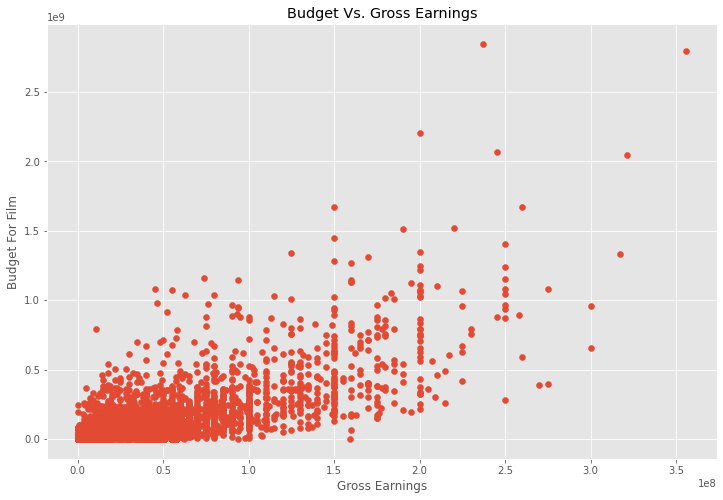

In [247]:
# Looking for what correlates highly with gross revenue

# Scatter plot with budget vs gross revenue

plt.scatter(x=movies['budget'], y=movies['gross'])

plt.title('Budget Vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

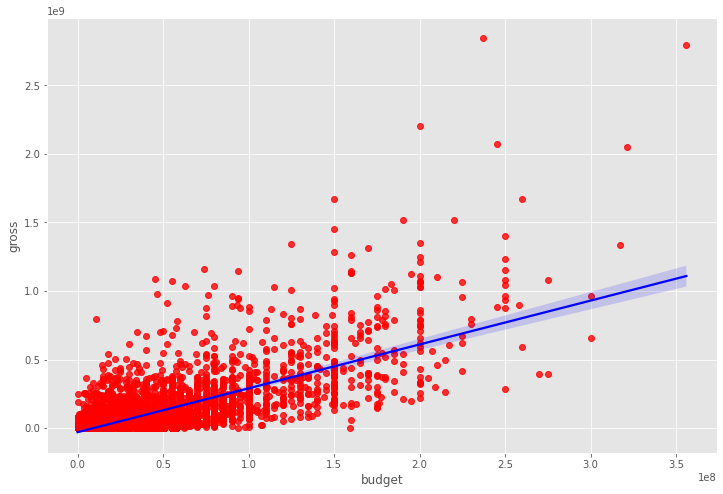

In [248]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=movies, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [249]:
# Start looking at correlation

In [250]:
movies.corr() 

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.399852,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.088516,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.436091,0.628713,0.309166
budget,0.399852,0.088516,0.436091,1.000000,0.707891,0.286675
gross,0.252042,0.182868,0.628713,0.707891,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.286675,0.241335,1.000000


In [251]:
# High correlation between budget and gross

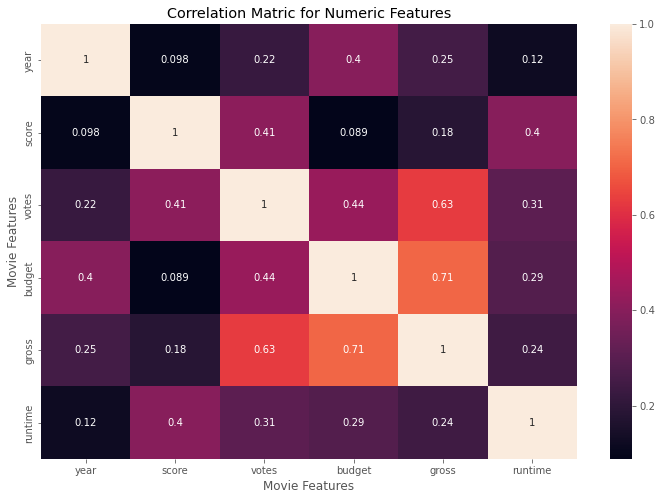

In [252]:
correlation_matrix = movies.corr() 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()



In [253]:
# Looking at company

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [212]:
df_numerized = movies

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6587,6,6,1980,1707,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5573,6,1,1980,1494,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5142,4,0,1980,1773,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1494,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1027,6,4,1980,1545,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2


In [254]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


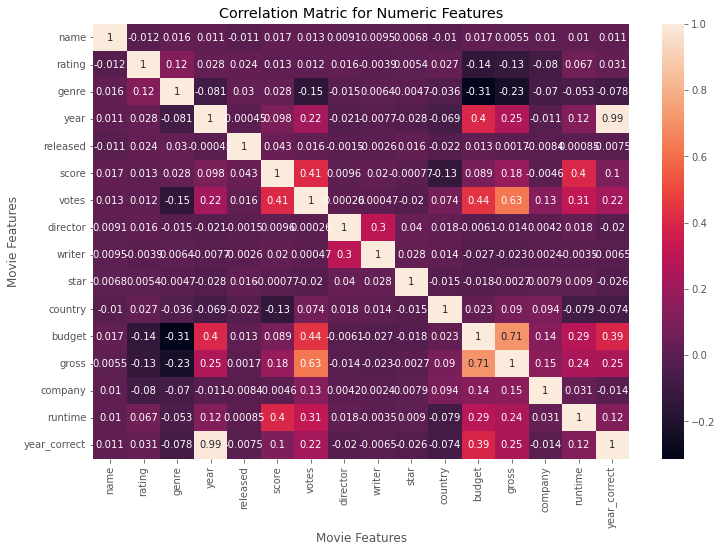

In [255]:
correlation_matrix = df_numerized.corr() 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [256]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.012441,0.016355,0.011453,-0.011069,0.017095,0.013086,0.009079,0.009485,0.006840,-0.010425,0.016955,0.005466,0.010369,0.010390,0.010789
rating,-0.012441,1.000000,0.123465,0.027931,0.023653,0.013246,0.012378,0.016255,-0.003931,0.005382,0.026930,-0.143725,-0.130083,-0.079626,0.066641,0.030549
genre,0.016355,0.123465,1.000000,-0.081261,0.029997,0.027959,-0.145276,-0.015258,0.006437,-0.004658,-0.035896,-0.313041,-0.230267,-0.070013,-0.052699,-0.078486
year,0.011453,0.027931,-0.081261,1.000000,-0.000445,0.097936,0.222810,-0.020795,-0.007711,-0.027901,-0.069423,0.399852,0.252042,-0.011438,0.120766,0.991195
released,-0.011069,0.023653,0.029997,-0.000445,1.000000,0.042577,0.016140,-0.001480,-0.002618,0.015535,-0.022015,0.013399,0.001672,-0.008376,0.000853,-0.007484
score,0.017095,0.013246,0.027959,0.097936,0.042577,1.000000,0.409182,0.009559,0.019706,-0.000770,-0.134577,0.088516,0.182868,-0.004594,0.399329,0.102764
votes,0.013086,0.012378,-0.145276,0.222810,0.016140,0.409182,1.000000,0.000260,0.000473,-0.019507,0.073582,0.436091,0.628713,0.130638,0.309166,0.218492
director,0.009079,0.016255,-0.015258,-0.020795,-0.001480,0.009559,0.000260,1.000000,0.299849,0.039867,0.017926,-0.006136,-0.014272,0.004250,0.017624,-0.019741
writer,0.009485,-0.003931,0.006437,-0.007711,-0.002618,0.019706,0.000473,0.299849,1.000000,0.028213,0.014229,-0.027446,-0.022962,0.002407,-0.003458,-0.006468
star,0.006840,0.005382,-0.004658,-0.027901,0.015535,-0.000770,-0.019507,0.039867,0.028213,1.000000,-0.015051,-0.018229,-0.002680,0.007936,0.008979,-0.025861


In [258]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.012441
              genre           0.016355
              year            0.011453
              released       -0.011069
              score           0.017095
              votes           0.013086
              director        0.009079
              writer          0.009485
              star            0.006840
              country        -0.010425
              budget          0.016955
              gross           0.005466
              company         0.010369
              runtime         0.010390
              year_correct    0.010789
rating        name           -0.012441
              rating          1.000000
              genre           0.123465
              year            0.027931
              released        0.023653
              score           0.013246
              votes           0.012378
              director        0.016255
              writer         -0.003931
              star       

In [260]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.313041
budget        genre          -0.313041
gross         genre          -0.230267
genre         gross          -0.230267
              votes          -0.145276
votes         genre          -0.145276
budget        rating         -0.143725
rating        budget         -0.143725
score         country        -0.134577
country       score          -0.134577
rating        gross          -0.130083
gross         rating         -0.130083
genre         year           -0.081261
year          genre          -0.081261
rating        company        -0.079626
company       rating         -0.079626
country       runtime        -0.079265
runtime       country        -0.079265
year_correct  genre          -0.078486
genre         year_correct   -0.078486
country       year_correct   -0.073783
year_correct  country        -0.073783
company       genre          -0.070013
genre         company        -0.070013
year          country        -0.069423
country       year       

In [261]:
high_corr = sorted_pairs[(sorted_pairs) > .5]

high_corr

votes         gross           0.628713
gross         votes           0.628713
              budget          0.707891
budget        gross           0.707891
year          year_correct    0.991195
year_correct  year            0.991195
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings